In [1]:
# Since you will have the 3-d ocean temperature, you can also plot the mean ocean temperature averaged 
# between 5N and 5S to a depth of 200 or 300 meters in the Pacific. This plot will show you how warm pool 
# water is advected from west to east equatorial Pacific to trigger an El Nino event.  

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cftime

In [2]:
from config import directory_figs, directory_data

In [3]:
def pop_lon_indx():
    """
    Extract mask for the pacific slab region. Mask contains ones and nans.
    """
    for_lon = xr.open_dataset('/glade/scratch/molina/amoc_exp/b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.000101-005012.nc')
    mask = for_lon['SST'].where((for_lon['TLAT']<5) & (for_lon['TLAT']>-5) & (for_lon['TLONG']>165) & (for_lon['TLONG']<-90+360), 
                                 drop=False).isel(z_t=0, time=0).values
    return np.where(np.isnan(mask), np.nan, 1)

def compute_iso(threedim_array, mask):
    """
    Create array of depth of isotherm using 3d iso array and 2d mask.
    Args:
        threedim_array (numpy array): Isotherm values.
        mask (numpy array): Mask from pop_lon_indx.
    Returns:
        One dimensional array across Pacific slab region.
    """
    newmask = np.nanmean(np.nanmean(threedim_array[:,:,:] * mask[np.newaxis,:,:], axis=0), axis=0) * 0.01
    return newmask[~np.isnan(newmask)]

In [4]:
# slab temps
ds_g02sv = xr.open_dataset(f'/glade/scratch/molina/amoc_exp/pacific_slab_g02sv.nc')
ds_g04sv = xr.open_dataset(f'/glade/scratch/molina/amoc_exp/pacific_slab_g04sv.nc')
ds_p02sv = xr.open_dataset(f'/glade/scratch/molina/amoc_exp/pacific_slab_p02sv.nc')
ds_p04sv = xr.open_dataset(f'/glade/scratch/molina/amoc_exp/pacific_slab_p04sv.nc')
ds_psalt = xr.open_dataset(f'/glade/scratch/molina/amoc_exp/pacific_slab_psalt.nc')
ds_cntrl = xr.open_dataset(f'/glade/scratch/molina/amoc_exp/pacific_slab_cntrl.nc')

# labels
est_lons = ds_g02sv['TLONG'].mean(dim=['nlat'], skipna=True).values-360
depth    = ds_g02sv.coords['z_t'].values

In [5]:
# grab lon indxs
lon_array_locs = pop_lon_indx()

In [6]:
# slab isotherms
iso20_g02sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalG02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].values

iso20_g04sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalG04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].values

iso20_p02sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalP02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].values

iso20_p04sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_20C'].values

iso20_psalt = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWPaSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(101, 1, 1, 0, 0),cftime.DatetimeNoLeap(250, 12, 1, 0, 0)))['DEPTH_OF_20C'].values

iso20_cntrl = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_005.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1599, 12, 1, 0, 0)))['DEPTH_OF_20C'].values

iso20_g02sv = compute_iso(iso20_g02sv, lon_array_locs)
iso20_g04sv = compute_iso(iso20_g04sv, lon_array_locs)
iso20_p02sv = compute_iso(iso20_p02sv, lon_array_locs)
iso20_p04sv = compute_iso(iso20_p04sv, lon_array_locs)
iso20_psalt = compute_iso(iso20_psalt, lon_array_locs)
iso20_cntrl = compute_iso(iso20_cntrl, lon_array_locs)

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


In [7]:
# slab isotherms
iso15_g02sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalG02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_15C'].values

iso15_g04sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalG04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_15C'].values

iso15_p02sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalP02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_15C'].values

iso15_p04sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_15C'].values

iso15_psalt = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWPaSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(101, 1, 1, 0, 0),cftime.DatetimeNoLeap(250, 12, 1, 0, 0)))['DEPTH_OF_15C'].values

iso15_cntrl = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_005.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1599, 12, 1, 0, 0)))['DEPTH_OF_15C'].values

iso15_g02sv = compute_iso(iso15_g02sv, lon_array_locs)
iso15_g04sv = compute_iso(iso15_g04sv, lon_array_locs)
iso15_p02sv = compute_iso(iso15_p02sv, lon_array_locs)
iso15_p04sv = compute_iso(iso15_p04sv, lon_array_locs)
iso15_psalt = compute_iso(iso15_psalt, lon_array_locs)
iso15_cntrl = compute_iso(iso15_cntrl, lon_array_locs)

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


In [8]:
# slab isotherms
iso12_g02sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalG02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_12C'].values

iso12_g04sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalG04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_12C'].values

iso12_p02sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalP02Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_12C'].values

iso12_p04sv = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWAtSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(500, 12, 1, 0, 0)))['DEPTH_OF_12C'].values

iso12_psalt = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_FWPaSalP04Sv.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(101, 1, 1, 0, 0),cftime.DatetimeNoLeap(250, 12, 1, 0, 0)))['DEPTH_OF_12C'].values

iso12_cntrl = xr.open_dataset(
    f'/glade/scratch/molina/amoc_exp/iso20c_005.nc').sel(
    TIME=slice(cftime.DatetimeNoLeap(800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1599, 12, 1, 0, 0)))['DEPTH_OF_12C'].values

iso12_g02sv = compute_iso(iso12_g02sv, lon_array_locs)
iso12_g04sv = compute_iso(iso12_g04sv, lon_array_locs)
iso12_p02sv = compute_iso(iso12_p02sv, lon_array_locs)
iso12_p04sv = compute_iso(iso12_p04sv, lon_array_locs)
iso12_psalt = compute_iso(iso12_psalt, lon_array_locs)
iso12_cntrl = compute_iso(iso12_cntrl, lon_array_locs)

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


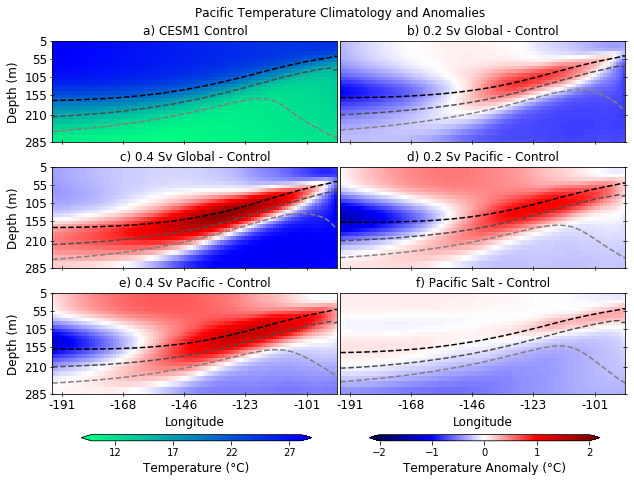

In [17]:
# --------------

a = u"\u00b0"
fig = plt.figure(figsize=(8,5))
fig.suptitle(u'Pacific Temperature Climatology and Anomalies', x=0.5, y=1.075, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.7, 0.495, 0.28])

ax1.set_title('a) CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(est_lons, depth*0.01, ds_cntrl['temp'].values, cmap='winter_r', vmin=10, vmax=28, shading='auto')

ax1.plot(est_lons, iso20_cntrl, c='k', lw=1.5, ls='--')
ax1.plot(est_lons, iso15_cntrl, c='0.3', lw=1.5, ls='--')
ax1.plot(est_lons, iso12_cntrl, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax1.set_yticks(depth[::5] * 0.01)
ax1.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax1.set_xticks(est_lons[3::20])
ax1.set_xticklabels((est_lons).astype('int')[3::20], fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax2 = plt.axes([0.5, 0.7, 0.495, 0.28])

ax2.set_title('b) 0.2 Sv Global - Control', fontsize=12)

ax2.pcolormesh(est_lons, depth*0.01, ds_g02sv['temp'].values-ds_cntrl['temp'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax2.plot(est_lons, iso20_g02sv, c='k', lw=1.5, ls='--')
ax2.plot(est_lons, iso15_g02sv, c='0.3', lw=1.5, ls='--')
ax2.plot(est_lons, iso12_g02sv, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax2.set_yticks(depth[::5] * 0.01)
ax2.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax2.set_xticks(est_lons[3::20])
ax2.set_xticklabels((est_lons).astype('int')[3::20], fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax3 = plt.axes([0., 0.35, 0.495, 0.28])

ax3.set_title('c) 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(est_lons, depth*0.01, ds_g04sv['temp'].values-ds_cntrl['temp'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax3.plot(est_lons, iso20_g04sv, c='k', lw=1.5, ls='--')
ax3.plot(est_lons, iso15_g04sv, c='0.3', lw=1.5, ls='--')
ax3.plot(est_lons, iso12_g04sv, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax3.set_yticks(depth[::5] * 0.01)
ax3.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax3.set_xticks(est_lons[3::20])
ax3.set_xticklabels((est_lons).astype('int')[3::20], fontsize=12)
ax3.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax3.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0.35, 0.495, 0.28])

ax4.set_title('d) 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(est_lons, depth*0.01, ds_p02sv['temp'].values-ds_cntrl['temp'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax4.plot(est_lons, iso20_p02sv, c='k', lw=1.5, ls='--')
ax4.plot(est_lons, iso15_p02sv, c='0.3', lw=1.5, ls='--')
ax4.plot(est_lons, iso12_p02sv, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax4.set_yticks(depth[::5] * 0.01)
ax4.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax4.set_xticks(est_lons[3::20])
ax4.set_xticklabels((est_lons).astype('int')[3::20], fontsize=12)
ax4.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax5 = plt.axes([0., 0.0, 0.495, 0.28])

ax5.set_title('e) 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(est_lons, depth*0.01, ds_p04sv['temp'].values-ds_cntrl['temp'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax5.plot(est_lons, iso20_p04sv, c='k', lw=1.5, ls='--')
ax5.plot(est_lons, iso15_p04sv, c='0.3', lw=1.5, ls='--')
ax5.plot(est_lons, iso12_p04sv, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax5.set_yticks(depth[::5] * 0.01)
ax5.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax5.set_xticks(est_lons[3::20])
ax5.set_xticklabels((est_lons).astype('int')[3::20], fontsize=12)
ax5.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)
ax5.set_xlabel('Longitude', fontsize=12)
ax5.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax6 = plt.axes([0.5, 0.0, 0.495, 0.28])

ax6.set_title('f) Pacific Salt - Control', fontsize=12)

cs2 = ax6.pcolormesh(est_lons, depth*0.01, ds_psalt['temp'].values-ds_cntrl['temp'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax6.plot(est_lons, iso20_psalt, c='k', lw=1.5, ls='--')
ax6.plot(est_lons, iso15_psalt, c='0.3', lw=1.5, ls='--')
ax6.plot(est_lons, iso12_psalt, c='0.5', lw=1.5, ls='--')

plt.ylim(depth.max()*0.01, depth.min()*0.01)
plt.xlim(est_lons.min(), est_lons.max())

ax6.set_yticks(depth[::5] * 0.01)
ax6.set_yticklabels(np.around(depth * 0.01).astype(int)[::5], fontsize=12)
ax6.set_xticks(est_lons[3::20])
ax6.set_xticklabels((est_lons).astype('int')[3::20], fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)
ax6.set_xlabel(u'Longitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.05, -0.13, 0.4, 0.0175])
ticks_1 = [10+2,15+2,20+2,25+2]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Temperature ('+a+'C)', fontsize=12)

cbar_ax = fig.add_axes([0.55, -0.13, 0.4, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Temperature Anomaly ('+a+'C)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_slabmean.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------